In [14]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder

#seaborn theme
sns.set_theme(style="whitegrid")

In [3]:
fish = pd.read_csv('http://bit.ly/FishDataset')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# Predict the weight of a fish given the species kind, lengths, height and width

indipendent = fish[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
indipendent

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [5]:
# Correlation
indipendent.corr()

# The variables are very highly correlated with each other

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

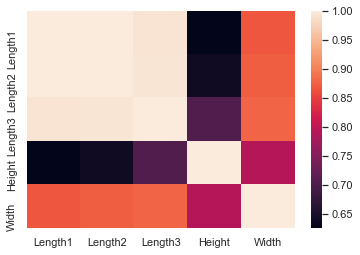

In [6]:
sns.heatmap(indipendent.corr())

In [19]:
# Encode the species
encoder = OrdinalEncoder()
fish['encoded_species'] = encoder.fit_transform(fish[['Species']])
fish['encoded_species'].value_counts()

2.0    56
0.0    35
4.0    20
3.0    17
5.0    14
1.0    11
6.0     6
Name: encoded_species, dtype: int64

In [20]:
# Will use ridge regression
X = fish[['encoded_species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y = fish['Weight'].values

In [21]:
ridge = Ridge(alpha=0.05, normalize=True)

ridge.fit(X, y)

Ridge(alpha=0.05, normalize=True)

In [22]:
y_pred = ridge.predict(X)

ridge_df = pd.DataFrame({'OG' : y, 'ridged values' : y_pred})
ridge_df

,OG,ridged values
0,242.0,328.487708
1,290.0,377.308798
2,340.0,392.324124
3,363.0,439.314656
4,430.0,467.370354
...,...,...
154,12.2,-135.550400
155,13.4,-131.132489
156,12.2,-125.049716
157,19.7,-53.748423


In [23]:
print('RMSE is : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))

RMSE is :  119.9830119568087


### Linear

In [24]:
linear = LinearRegression()

linear.fit(X, y)

LinearRegression()

In [25]:
y_pred_lin = linear.predict(X)

ridge_dff = pd.DataFrame({'OG' : y, 'ridged values' : y_pred_lin})
ridge_dff

,OG,ridged values
0,242.0,280.043634
1,290.0,330.846386
2,340.0,335.276966
3,363.0,422.771435
4,430.0,383.505593
...,...,...
154,12.2,-132.357208
155,13.4,-104.329043
156,12.2,-86.067401
157,19.7,-39.133598


In [26]:
print('RMSE is : ', np.sqrt(metrics.mean_squared_error(y, y_pred_lin)))

RMSE is :  115.87020475075737
